In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Configure display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [4]:
# Set plot style
sns.set_style("whitegrid")

### Task 1: The Dataset
- Loading and Familiarizing with the Data
- Are there any interesting things that stand out?

In [5]:
# Defining the path to dataset
file_path = 'ml-engineer-dataset.csv'


In [6]:
try:
    df = pd.read_csv(file_path)
    print(f"Dataset loaded successfully from: {file_path}")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found! Please put it in the correct directory.")
    exit()

Dataset loaded successfully from: ml-engineer-dataset.csv


In [7]:
# Initial Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43847 entries, 0 to 43846
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   contract-delivery        43847 non-null  object 
 1   demand-forecast          43847 non-null  float64
 2   temperature-normal       43847 non-null  float64
 3   temperature-forecast     43847 non-null  float64
 4   solar-forecast           43847 non-null  float64
 5   day-ahead-auction-price  43847 non-null  float64
 6   wind-forecast            43847 non-null  float64
 7   day-ahead-auction-time   43847 non-null  object 
dtypes: float64(6), object(2)
memory usage: 2.7+ MB


In [8]:

# Thoughts:
# Only two columns are found to be of object (string) datatype --> `contract-delivery` and `day-ahead-auction-time`
# No missing values, i.e., non-null. No need for imputation.

In [9]:
# First 5 rows
print(df.head())

           contract-delivery  demand-forecast  temperature-normal  temperature-forecast  solar-forecast  day-ahead-auction-price  wind-forecast     day-ahead-auction-time
0  2020-01-01 00:00:00+00:00         43471.50            1.317628                   0.6             0.0                    38.60        7019.50  2019-12-31 11:00:00+00:00
1  2020-01-01 01:00:00+00:00         42555.50            1.285980                   0.3             0.0                    36.55        7407.00  2019-12-31 11:00:00+00:00
2  2020-01-01 02:00:00+00:00         42448.25            1.224420                  -0.1             0.0                    32.32        7540.50  2019-12-31 11:00:00+00:00
3  2020-01-01 03:00:00+00:00         42567.75            1.169376                  -0.4             0.0                    30.85        7802.75  2019-12-31 11:00:00+00:00
4  2020-01-01 04:00:00+00:00         42209.00            1.101194                  -0.7             0.0                    30.14        7805.75  

In [10]:
# Last 10 rows:")
print(df.tail(10))

               contract-delivery  demand-forecast  temperature-normal  temperature-forecast  solar-forecast  day-ahead-auction-price  wind-forecast     day-ahead-auction-time
43837  2024-12-31 13:00:00+00:00         55859.00            3.590067                   2.8          6948.0                    76.84       24589.50  2024-12-30 11:00:00+00:00
43838  2024-12-31 14:00:00+00:00         54947.50            3.293482                   2.1          2520.5                    82.07       27248.50  2024-12-30 11:00:00+00:00
43839  2024-12-31 15:00:00+00:00         54901.75            2.769080                   1.3           123.5                    83.67       29551.25  2024-12-30 11:00:00+00:00
43840  2024-12-31 16:00:00+00:00         56314.00            2.488333                   0.9             2.5                    83.25       30399.00  2024-12-30 11:00:00+00:00
43841  2024-12-31 17:00:00+00:00         56915.00            2.249007                   0.9             1.5                  

In [11]:
# Thoughts:
# 'contract-delivery' progresses hourly
# while 'day-ahead-auction-time' updates daily for 24 new contracts (single contract per hour).

In [12]:
# Statistics
print(df.describe())

       demand-forecast  temperature-normal  temperature-forecast  solar-forecast  day-ahead-auction-price  wind-forecast
count     43847.000000        43847.000000          43847.000000    43847.000000             43847.000000   43847.000000
mean      54168.834658           10.027417             11.171371     6110.825530               107.447477   14793.633972
std        9232.674783            6.724638              7.429299     9450.017605               105.707266   10952.121262
min       30544.750000           -0.119118            -11.200000        0.000000              -500.000000      46.500000
25%       46634.625000            3.528642              5.400000        1.500000                41.350000    5880.000000
50%       54049.250000            9.707157             10.600000      188.250000                81.740000   11889.750000
75%       61762.125000           15.601056             16.800000     9680.125000               129.705000   21702.500000
max       77585.750000          

In [13]:
# Thoughts:
# row 'min' has negative values. Looks like high renewable penetration.
# happens where supply (especially renewables) exceeds demand, and generators might pay to offload electricity to avoid grid instability.
# row 'max' high price spikes: 2325 Eur 
# Model must be able to predict these values and outliers.

In [14]:
# Incorrect data types --> Data Type Conversion
# `contract-delivery` and `day-ahead-auction-time` are strings. They should ideally be ´datetime` objects.
df['contract-delivery'] = pd.to_datetime(df['contract-delivery'])
df['day-ahead-auction-time'] = pd.to_datetime(df['day-ahead-auction-time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43847 entries, 0 to 43846
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   contract-delivery        43847 non-null  datetime64[ns, UTC]
 1   demand-forecast          43847 non-null  float64            
 2   temperature-normal       43847 non-null  float64            
 3   temperature-forecast     43847 non-null  float64            
 4   solar-forecast           43847 non-null  float64            
 5   day-ahead-auction-price  43847 non-null  float64            
 6   wind-forecast            43847 non-null  float64            
 7   day-ahead-auction-time   43847 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), float64(6)
memory usage: 2.7 MB


In [15]:
# Sorting and Unique Identifiers
# Mulitple rows with same 'day-ahead-auction-time' found. So, sorting this group further by 'contract-delivery'
# ensuring no data leak while training 
# info available before the auction time must be used for prediction 

df = df.sort_values(by=['day-ahead-auction-time', 'contract-delivery']).reset_index(drop=True)

In [16]:
# Check for uniqueness of 'contract-delivery' as a row identifier
if df['contract-delivery'].is_unique:
    print("Well-informed: Unique event for each row is identified.")
else:
    print("Event is NOT unique or found an issue.")

Well-informed: Unique event for each row is identified.


In [17]:
# Check for duplicates across all columns
if df.duplicated().any():
    print(f"Duplicate rows found! Number of duplicate rows: {df.duplicated().sum()}")
    df.drop_duplicates(inplace=True)
    print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [18]:
# Missing values analysis
print(df.isnull().sum())

contract-delivery          0
demand-forecast            0
temperature-normal         0
temperature-forecast       0
solar-forecast             0
day-ahead-auction-price    0
wind-forecast              0
day-ahead-auction-time     0
dtype: int64


In [19]:
# Relationship b/n Auction Time and Delivery Time

time_difference = df['contract-delivery'] - df['day-ahead-auction-time']
print(f"\nAverage time difference between contract delivery and auction time: {time_difference.mean()}")
print(f"Min time difference: {time_difference.min()}")
print(f"Max time difference: {time_difference.max()}")



Average time difference between contract delivery and auction time: 0 days 23:30:01.354710698
Min time difference: 0 days 12:00:00
Max time difference: 1 days 12:00:00


In [20]:
# Thoughts:
# This is the day-ahead auction market structure
# Shortest lag/'min' difference = 12 hours (00:00 delivery, auction at 12:00 previous day)
# Longest lag/'max' difference = 36 hours


In [21]:
# Assuming provided timestamps are in UTC.
# CET is UTC+1 during standard time, UTC+2 during daylight saving.

# Let's re-calculate time differences based on UTC delivery and auction times.
# The calculation `df['contract-delivery'] - df['day-ahead-auction-time']` correctly gives the timedelta.


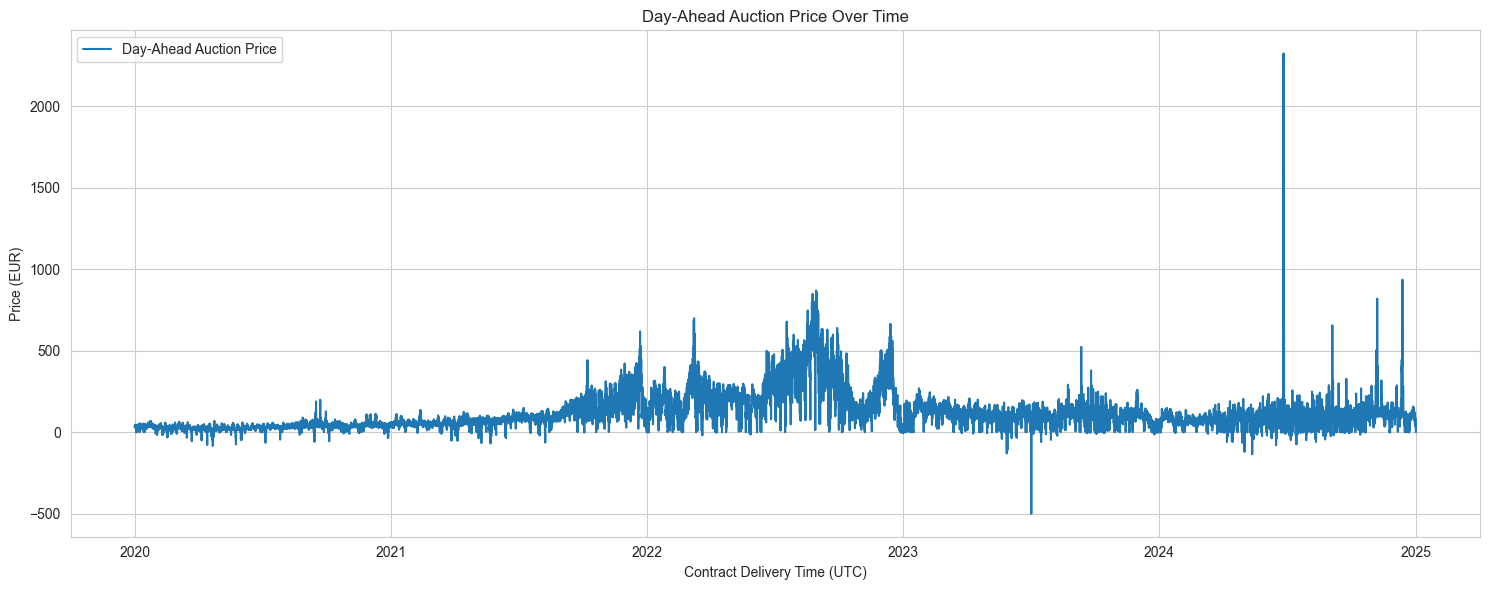

In [22]:
# Visualisation Key data Distributions and Time Series Patterns

# Day-Ahead Auction Price Over Time
plt.figure(figsize=(15, 6))
plt.plot(df['contract-delivery'], df['day-ahead-auction-price'], label='Day-Ahead Auction Price')
plt.title('Day-Ahead Auction Price Over Time')
plt.xlabel('Contract Delivery Time (UTC)')
plt.ylabel('Price (EUR)')
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
# Thoughts:
# spikes and negative prices were visible. High demand & low supply vice-versa.
# high volatile & have non linear relations 

Text(0, 0.5, 'Frequency')

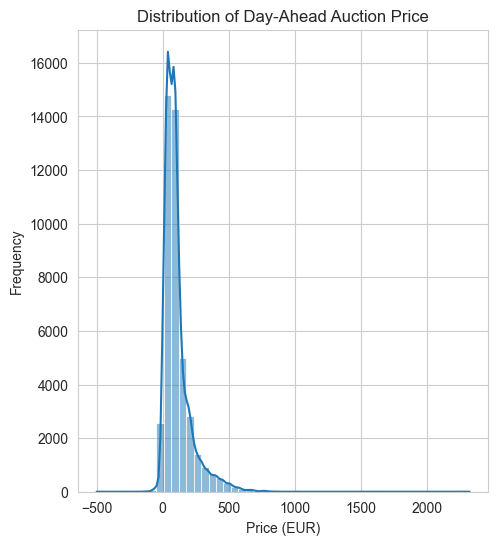

In [24]:
# Day-Ahead Auction Price Distribution
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['day-ahead-auction-price'], bins=50, kde=True)
plt.title('Distribution of Day-Ahead Auction Price')
plt.xlabel('Price (EUR)')
plt.ylabel('Frequency')

In [25]:
# Thoughts:
# distribution is highly right-skewed

Text(0, 0.5, 'Frequency')

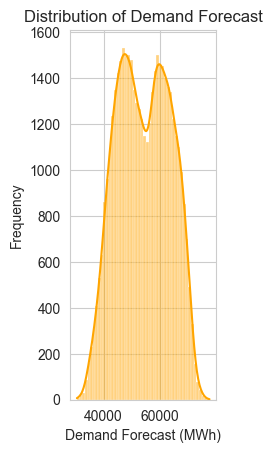

In [26]:
# Demand Forecast Distribution

plt.subplot(1, 3, 2)
sns.histplot(df['demand-forecast'], bins=50, kde=True, color='orange')
plt.title('Distribution of Demand Forecast')
plt.xlabel('Demand Forecast (MWh)')
plt.ylabel('Frequency')

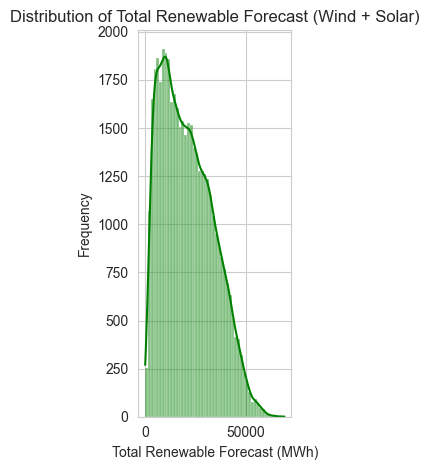

In [27]:
# Total Renewable Forecast

plt.subplot(1, 3, 3)
sns.histplot(df['wind-forecast'] + df['solar-forecast'], bins=50, kde=True, color='green')
plt.title('Distribution of Total Renewable Forecast (Wind + Solar)')
plt.xlabel('Total Renewable Forecast (MWh)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [28]:
# Thoughts:
# distribution is right-skewed

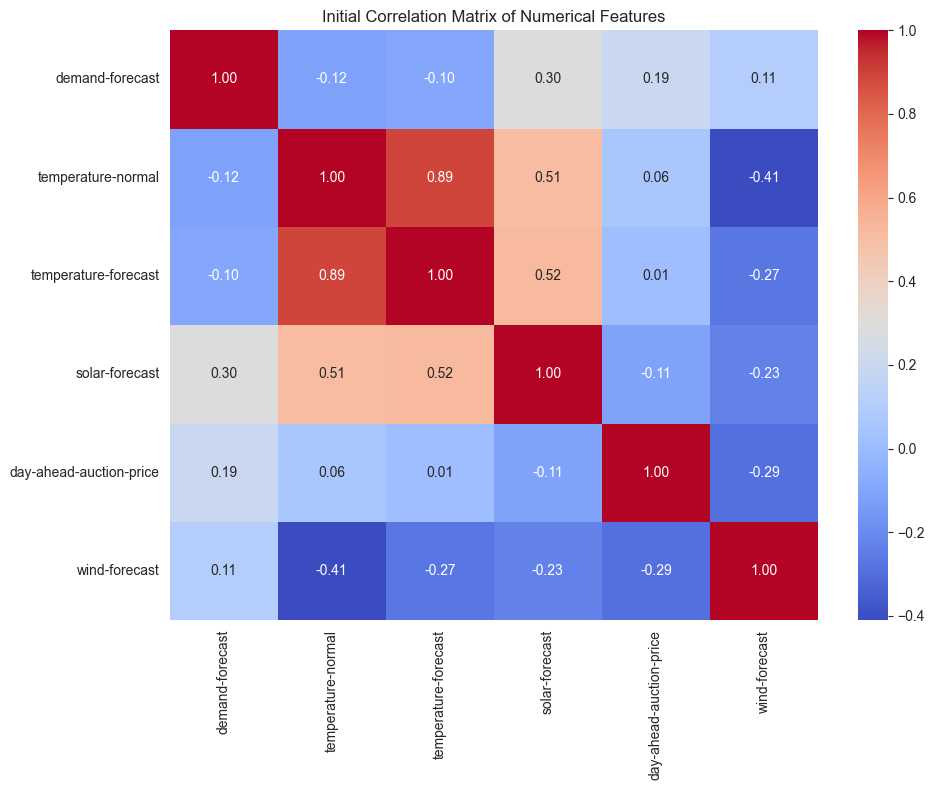

                         demand-forecast  temperature-normal  temperature-forecast  solar-forecast  day-ahead-auction-price  wind-forecast
demand-forecast                 1.000000           -0.115556             -0.095990        0.299509                 0.194064       0.107392
temperature-normal             -0.115556            1.000000              0.892352        0.513392                 0.058104      -0.410359
temperature-forecast           -0.095990            0.892352              1.000000        0.520240                 0.012175      -0.268210
solar-forecast                  0.299509            0.513392              0.520240        1.000000                -0.108085      -0.231720
day-ahead-auction-price         0.194064            0.058104              0.012175       -0.108085                 1.000000      -0.290764
wind-forecast                   0.107392           -0.410359             -0.268210       -0.231720                -0.290764       1.000000


In [29]:
# Correlation Matrix during this phase

numerical_cols = df.select_dtypes(include=np.number).columns
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Initial Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()
print(corr_matrix)

In [30]:
# Thoughts:
# auction price has a positive correlation with demand forecase (0.19)
# -- > higher the demand higher the prices
# auction price has a negative correl with wind (-0.29) & solar (-0.11) forecast
# -- > solar is available only during daylight time, hence weaker correl
# temp-normal +ive correl with solar forecast (0.51)
# -- > more sun during warmer periods
# wind forecase has -ve correl with temp-normal (-0.41) & temp forecast (-0.27)
# -- > may be due to season. colder time means low normal temp and are windier

In [31]:
# for linear models
#-- > we might not need both temp-normal & temp-forecast, bcz they have high correl



### Task 2: Building a Baseline Model
- we'll use temporal features & direct forecasts.

In [32]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

In [33]:
# Baseline Feature Engineering
# we'll use 'contract-delivery' to extract 'hour of day' and 'day of week'
df['hour_of_day'] = df['contract-delivery'].dt.hour
df['day_of_week'] = df['contract-delivery'].dt.dayofweek # Monday=0

In [34]:
# Defining features for baseline model.
# using direct forecasts and simple time features.
baseline_features = [
    'hour_of_day',
    'day_of_week',
    'demand-forecast',
    'wind-forecast',
    'solar-forecast',
    'temperature-forecast',
    'temperature-normal'
]
target = 'day-ahead-auction-price'

X = df[baseline_features]
y = df[target]

print(f"Baseline features are: {baseline_features}")

Baseline features are: ['hour_of_day', 'day_of_week', 'demand-forecast', 'wind-forecast', 'solar-forecast', 'temperature-forecast', 'temperature-normal']


In [35]:
# Data Splitting (Time-Based)
# splitting data chronologically is required.
# train on past data to predict future data. A simple random split would cause "data leakage".
# Let's use 80% of the data for training and 20% for testing.
split_index = int(len(df) * 0.8)
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]


In [36]:
X_train = train_df[baseline_features]
y_train = train_df[target]
X_test = test_df[baseline_features]
y_test = test_df[target]

print(f"Train set starts: {train_df['day-ahead-auction-time'].min()} and ends: {train_df['day-ahead-auction-time'].max()}")
print(f"Test set starts: {test_df['day-ahead-auction-time'].min()} and ends: {test_df['day-ahead-auction-time'].max()}")
print(f"Training data shape: {X_train.shape}, Target shape: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, Target shape: {y_test.shape}")


Train set starts: 2019-12-31 11:00:00+00:00 and ends: 2023-12-31 11:00:00+00:00
Test set starts: 2023-12-31 11:00:00+00:00 and ends: 2024-12-30 11:00:00+00:00
Training data shape: (35077, 7), Target shape: (35077,)
Testing data shape: (8770, 7), Target shape: (8770,)


In [37]:
# Building Linear Regression model (Simple Baseline Model)

baseline_model = LinearRegression()

In [38]:
# Train the model
start_time = time.time()
baseline_model.fit(X_train, y_train)
train_time_baseline = time.time() - start_time
print(f"Baseline model training complete in {train_time_baseline:.2f} seconds.")

Baseline model training complete in 0.03 seconds.


In [39]:
# Make predictions on the test set
start_time = time.time()
y_pred_baseline = baseline_model.predict(X_test)
predict_time_baseline = time.time() - start_time
print(f"Baseline model prediction complete in {predict_time_baseline:.2f} seconds.")

Baseline model prediction complete in 0.01 seconds.


In [40]:
import sklearn
print(sklearn.__version__)
print(sklearn.__file__)

1.7.0
d:\Machine_learning\Projects\Terra_one_challenge\ML_Challenge_TerraOne\.venv\Lib\site-packages\sklearn\__init__.py


In [47]:
# Evaluating the Performance of Baseline model
def evaluate_model(y_true, y_pred, model_name="Model"):
    """Evaluates regression model performance using MAE, RMSE, and R2."""
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"Mean Absolute Error (MAE): {mae:.2f} EUR")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f} EUR")
    print(f"R-squared (R2): {r2:.2f}")
    return mae, rmse, r2

mae_baseline, rmse_baseline, r2_baseline = evaluate_model(y_test, y_pred_baseline, "Baseline Linear Regression")


Mean Absolute Error (MAE): 32.02 EUR
Root Mean Squared Error (RMSE): 54.37 EUR
R-squared (R2): 0.29


In [59]:
# Thoughts:
# MAE: On average, baseline model's predictions are off by ~32.02 Euros from the actual day-ahead auction price. 
# RMSE: 54.37 EUR is significantly higher. model makes some large errors/outliers (could be due to spikes). 
# R2: only 29% of the variance in day-ahead auction prices can be explained by this model. higher R2, indicates a stronger predictive power.
# -- > This low value strongly suggests that the simple linear relationships captured by baseline model are insufficient to explain complex dynamics of power prices.

In [48]:
# Analyze Patterns: Predicted vs. Realized Prices

# Creating DF for plotting test results
test_results_baseline = test_df.copy()
test_results_baseline['predicted_price'] = y_pred_baseline
test_results_baseline['residuals'] = test_results_baseline['day-ahead-auction-price'] - test_results_baseline['predicted_price']


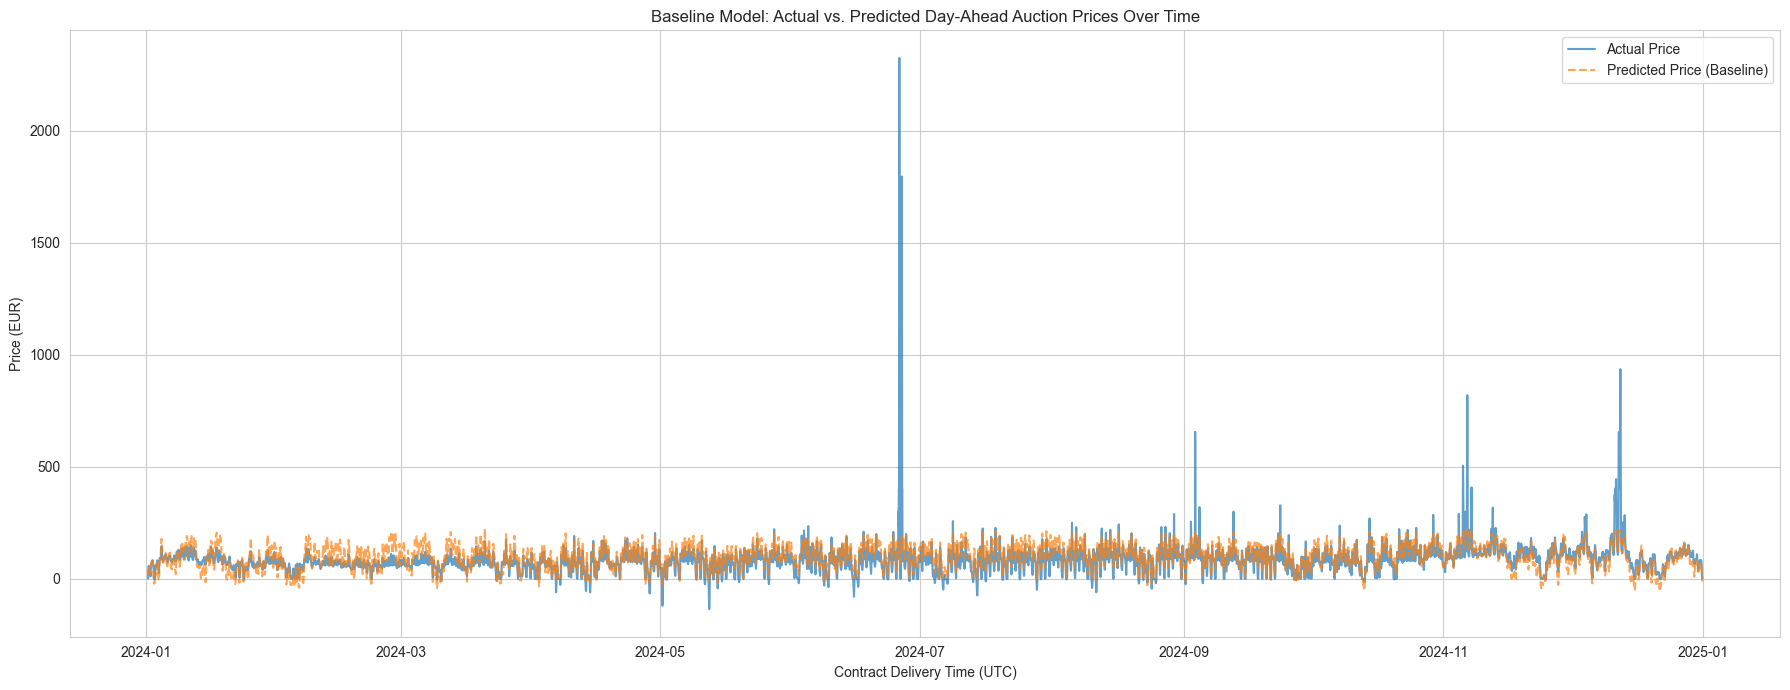

In [49]:
# Time Series Plot: Actual vs. Predicted
plt.figure(figsize=(18, 7))
plt.plot(test_results_baseline['contract-delivery'], test_results_baseline['day-ahead-auction-price'], label='Actual Price', alpha=0.7)
plt.plot(test_results_baseline['contract-delivery'], test_results_baseline['predicted_price'], label='Predicted Price (Baseline)', alpha=0.7, linestyle='--')
plt.title('Baseline Model: Actual vs. Predicted Day-Ahead Auction Prices Over Time')
plt.xlabel('Contract Delivery Time (UTC)')
plt.ylabel('Price (EUR)')
plt.legend()
plt.tight_layout()
plt.show()

In [60]:
# Thoughts:
# Time Series Plot Insights
# Predictions are smoother/less volatile; model misses most spikes/dips.
# Underfitting volatility and extreme events.
# -- > need for feature and model capable of capturing these non-linear and extreme behaviors.

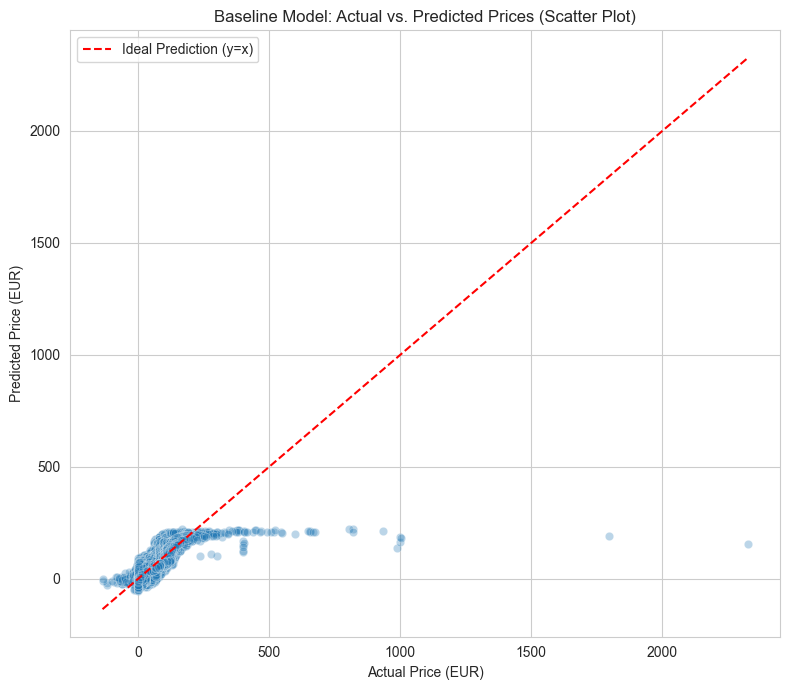

In [50]:
# Scatter Plot: Actual vs. Predicted
plt.figure(figsize=(8, 7))
sns.scatterplot(x=test_results_baseline['day-ahead-auction-price'], y=test_results_baseline['predicted_price'], alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Prediction (y=x)')
plt.title('Baseline Model: Actual vs. Predicted Prices (Scatter Plot)')
plt.xlabel('Actual Price (EUR)')
plt.ylabel('Predicted Price (EUR)')
plt.legend()
plt.tight_layout()
plt.show()

In [61]:
# Thoughts: 
# Most predictions cluster at low actual prices; 
# strong downward bias for high actuals (the predicted prices are much lower than actual).
# Struggles with negative prices.
# need for non-linear model and features that drive predictions towards extreme values.

Text(0, 0.5, 'Frequency')

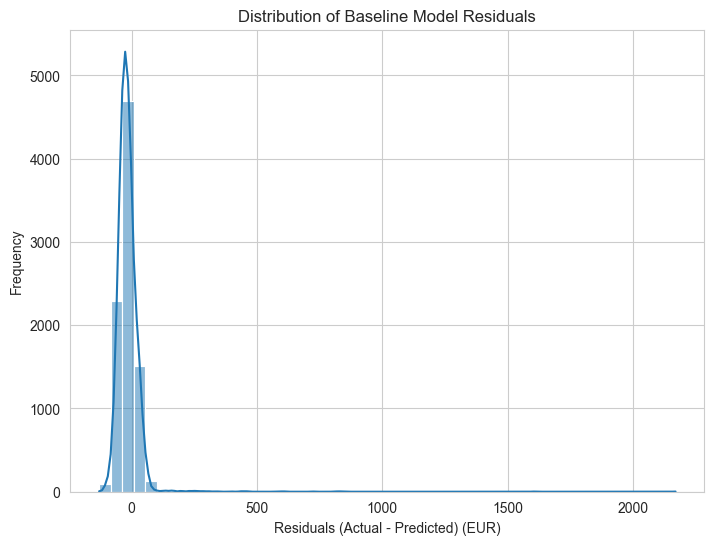

In [52]:
# Residuals Analysis
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.histplot(test_results_baseline['residuals'], bins=50, kde=True)
plt.title('Distribution of Baseline Model Residuals')
plt.xlabel('Residuals (Actual - Predicted) (EUR)')
plt.ylabel('Frequency')

In [63]:
# Thoughts:
# Heavily right-skewed; frequent/larger positive residuals.
# Positive residuals (actual > predicted) are frequent.
# --> means model frequently under-predicts the actual price.
# perfect model -> normally distributed & residuals centered around zero.

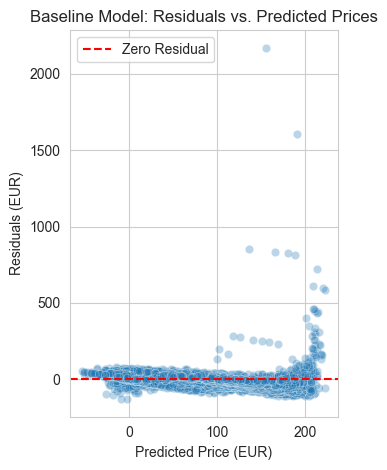

In [53]:
plt.subplot(1, 2, 2)
sns.scatterplot(x=test_results_baseline['predicted_price'], y=test_results_baseline['residuals'], alpha=0.3)
plt.axhline(0, color='r', linestyle='--', label='Zero Residual')
plt.title('Baseline Model: Residuals vs. Predicted Prices')
plt.xlabel('Predicted Price (EUR)')
plt.ylabel('Residuals (EUR)')
plt.legend()
plt.tight_layout()
plt.show()


In [64]:
# Thoughts:
# model's errors are not constant across the range of predictions. 
# It performs relatively okay for normal/low price ranges but completely breaks down for higher prices. 
# linear model struggling with non-linear relationships and heteroscedasticity.
# Heteroscedasticity: Error variance increases with predicted price (fanning-out).
# need model that can handle changing error variance and non-linear relationships.

Text(0, 0.5, 'Residuals (EUR)')

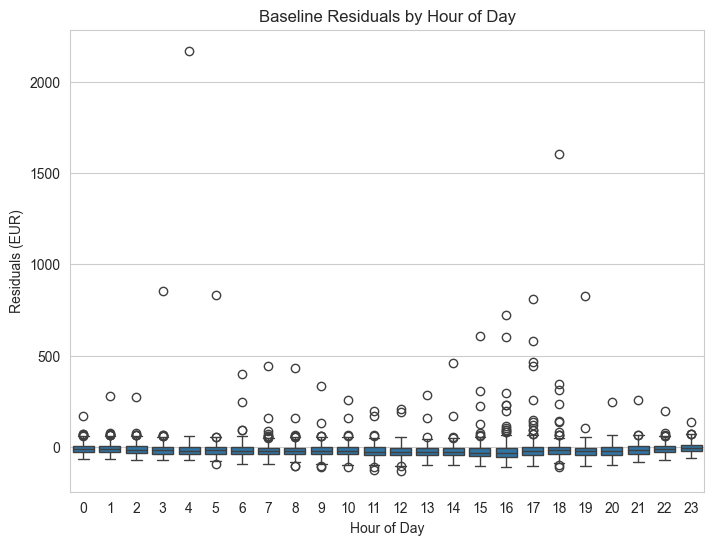

In [54]:
# Residuals Analysis by Time/Feature

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=test_results_baseline['contract-delivery'].dt.hour, y=test_results_baseline['residuals'])
plt.title('Baseline Residuals by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Residuals (EUR)')

In [65]:
# Thoughts:
# median residual is near zero for most hours, 
# the spread of residuals varies significantly by hour. 
# hours like 4-5 AM (low demand) and 16-19 PM (evening peak) show larger positive outliers and greater variance.
# This indicates the model struggles more during these specific hours.

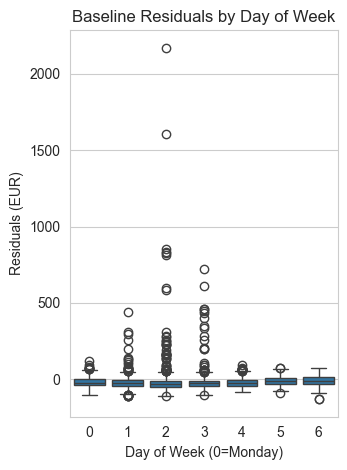

In [55]:
plt.subplot(1, 2, 2)
sns.boxplot(x=test_results_baseline['contract-delivery'].dt.dayofweek, y=test_results_baseline['residuals'])
plt.title('Baseline Residuals by Day of Week')
plt.xlabel('Day of Week (0=Monday)')
plt.ylabel('Residuals (EUR)')
plt.tight_layout()
plt.show()

In [68]:
# Thoughts:
# Baseline features inadequate for nuanced temporal effects.
# median residual is generally around zero
# but Monday-Wednesday (0-2) show a larger spread of residuals and more significant positive outliers compared to weekends (5-6). 
# suggesting baseline model has more trouble with weekday market dynamics.

In [69]:
# baseline model, despite having 'hour_of_day' and 'day_of_week' as features, 
# doesn't fully capture the complex, non-linear influence of these temporal patterns on residuals.

In [ ]:
# Analysing residuals for extreme values (e.g., negative prices or high spikes)
# residuals = actual - predicted


# '+' residual: actual > predicted (model underpredicted)
# '-' residual: actual < predicted (model overpredicted)

# finding cases where actual price is very low (negative)
negative_price_errors = test_results_baseline[test_results_baseline['day-ahead-auction-price'] < 0]
if not negative_price_errors.empty:
    print(f"Average absolute error for negative actual prices: {negative_price_errors['residuals'].abs().mean():.2f}")
    print(negative_price_errors[['day-ahead-auction-price', 'predicted_price', 'residuals']].head())


Average absolute error for negative actual prices: 29.83
       day-ahead-auction-price  predicted_price  residuals
35111                    -0.08       -19.129420  19.049420
35112                    -1.23       -15.970753  14.740753
35113                    -1.30       -21.746023  20.446023
35114                    -1.31       -21.179472  19.869472
35115                    -1.31       -16.506875  15.196875


In [57]:
# finding cases where actual price is very high (e.g., top 1%)
high_price_threshold = test_results_baseline['day-ahead-auction-price'].quantile(0.99)
high_price_errors = test_results_baseline[test_results_baseline['day-ahead-auction-price'] > high_price_threshold]
if not high_price_errors.empty:
    print(f"\nAverage absolute error for high actual prices (> {high_price_threshold:.2f} EUR): {high_price_errors['residuals'].abs().mean():.2f}")
    print(high_price_errors[['day-ahead-auction-price', 'predicted_price', 'residuals']].head())


Average absolute error for high actual prices (> 235.25 EUR): 254.52
       day-ahead-auction-price  predicted_price   residuals
38802                   235.52       170.778926   64.741074
39310                   300.03       102.204406  197.825594
39312                   279.75       112.835307  166.914693
39313                   400.00       118.443477  281.556523
39314                   400.04       126.064977  273.975023


In [70]:
# Thoughts:
# for prices > 235, on average the model is off by 254 Eur
# residuals are underpredicted
# fails to capture & predict high price spikes
# Therefore, RMSE was much higher than MAE 

In [71]:
# Reasons could be..
# Regression towards mean, struggles to extrapolate extreme highs or lows
# --> if extreme high or low prices are rare, model might struggle to push its prediction either far up or down.
# Linearity assumption: 
# --> single straight line cannot accurately fit non-linear, volatile sharp upward and downward dip simulataneously. 
# sensitive to outliers
